### 1) Importing Libraries and Data Frame

In [1]:
# Importing libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# Importing movies_modified_3.csv dataframe

path = r'/Users/matthewabrams/Desktop/Movie Analysis'

movies = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'movies_modified_3.csv'), index_col = False)

movies.drop(columns = 'Unnamed: 0', inplace = True)

movies

,name,rating,unknown rating,genre,year,IMDb score,average IMDb score for country per film,votes,average number of votes for country per film,director,...,gross,average gross for country per film,profit,average profit for country per film,gross category,company,unknown company,duration (in min),released date,unknown released date
0,The Shining,R,False,Drama,1980,8.4,6.4,927000.0,95064.85761,Stanley Kubrick,...,46998772.0,86317303.02,27998772.0,52914083.47,20-100 M,Warner Bros.,False,146.0,1980-06-13,False
1,The Blue Lagoon,R,False,Adventure,1980,5.8,6.4,65000.0,95064.85761,Randal Kleiser,...,58853106.0,86317303.02,54353106.0,52914083.47,20-100 M,Columbia Pictures,False,104.0,1980-07-02,False
2,Star Wars: Episode V - The Empire Strikes Back,PG,False,Action,1980,8.7,6.4,1200000.0,95064.85761,Irvin Kershner,...,538375067.0,86317303.02,520375067.0,52914083.47,> 100 M,Lucasfilm,False,124.0,1980-06-20,False
3,Airplane!,PG,False,Comedy,1980,7.7,6.4,221000.0,95064.85761,Jim Abrahams,...,83453539.0,86317303.02,79953539.0,52914083.47,20-100 M,Paramount Pictures,False,88.0,1980-07-02,False
4,Caddyshack,R,False,Comedy,1980,7.3,6.4,108000.0,95064.85761,Harold Ramis,...,39846344.0,86317303.02,33846344.0,52914083.47,20-100 M,Orion Pictures,False,98.0,1980-07-25,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,True,Drama,2020,3.1,6.4,18.0,95064.85761,Joseph Ebanks,...,20205757.0,86317303.02,20198757.0,52914083.47,20-100 M,NaN,True,90.0,2020-10-23,False
7664,Dream Round,NaN,True,Comedy,2020,4.7,6.4,36.0,95064.85761,Dusty Dukatz,...,20205757.0,86317303.02,-294243.0,52914083.47,20-100 M,Cactus Blue Entertainment,False,90.0,2020-02-07,False
7665,Saving Mbango,NaN,True,Drama,2020,5.7,5.7,29.0,29.00000,Nkanya Nkwai,...,20205757.0,20205757.00,20147007.0,20147007.00,20-100 M,Embi Productions,False,104.0,2020-04-27,False
7666,It's Just Us,NaN,True,Drama,2020,6.4,6.4,33000.0,95064.85761,James Randall,...,20205757.0,86317303.02,20190757.0,52914083.47,20-100 M,NaN,True,120.0,2020-10-01,False


In [3]:
# Printing a subset of movies_modified_3.csv dataframe by columns by numerical data (excluding categorical data)

movies_numerical = movies[['budget', 'gross', 'profit', 'votes', 'IMDb score']]
movies_numerical

,budget,gross,profit,votes,IMDb score
0,19000000.0,46998772.0,27998772.0,927000.0,8.4
1,4500000.0,58853106.0,54353106.0,65000.0,5.8
2,18000000.0,538375067.0,520375067.0,1200000.0,8.7
3,3500000.0,83453539.0,79953539.0,221000.0,7.7
4,6000000.0,39846344.0,33846344.0,108000.0,7.3
...,...,...,...,...,...
7663,7000.0,20205757.0,20198757.0,18.0,3.1
7664,20500000.0,20205757.0,-294243.0,36.0,4.7
7665,58750.0,20205757.0,20147007.0,29.0,5.7
7666,15000.0,20205757.0,20190757.0,33000.0,6.4


### 2) Elbow Technique

In [4]:
clusters = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in clusters] # Defines k-means clusters in the range assigned above.

In [5]:
score = [kmeans[i].fit(movies_numerical).score(movies_numerical) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-3.645884878679871e+20,
 -1.4207156241789277e+20,
 -7.578060474961537e+19,
 -5.252842721657046e+19,
 -3.5423868985906983e+19,
 -2.6625461351035757e+19,
 -2.1404180375504577e+19,
 -1.8029556770683634e+19,
 -1.5858190951322913e+19]

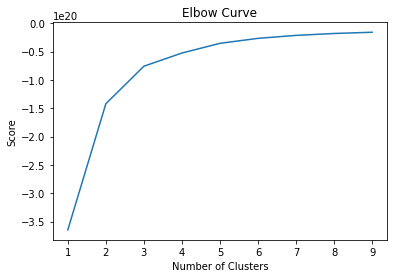

In [6]:
# Plot the elbow curve using PyLab.

pl.plot(clusters,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

In [7]:
# There's a large jump from 2 to 3 on the x axis, but after that, the curve straightens out. 
# That means the optimal number of clusters should be 3

### 3) k-means clustering

In [8]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3, n_jobs = -1) 

In [9]:
# Fit the k-means object to the data.

kmeans.fit(movies_numerical)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=3, n_jobs=-1)

In [10]:
movies_numerical['clusters'] = kmeans.fit_predict(movies_numerical)

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"
/var/folders/t8/xh28456s3kngn8qzvmt25b700000gn/T/ipykernel_12172/436818056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_numerical['clusters'] = kmeans.fit_predict(movies_numerical)


In [11]:
movies_numerical.head(20)

,budget,gross,profit,votes,IMDb score,clusters
0,19000000.0,46998772.0,27998772.0,927000.0,8.4,0
1,4500000.0,58853106.0,54353106.0,65000.0,5.8,0
2,18000000.0,538375067.0,520375067.0,1200000.0,8.7,2
3,3500000.0,83453539.0,79953539.0,221000.0,7.7,0
4,6000000.0,39846344.0,33846344.0,108000.0,7.3,0
5,550000.0,39754601.0,39204601.0,123000.0,6.4,0
6,27000000.0,115229890.0,88229890.0,188000.0,7.9,0
7,18000000.0,23402427.0,5402427.0,330000.0,8.2,0
8,54000000.0,108185706.0,54185706.0,101000.0,6.8,0
9,10000000.0,15795189.0,5795189.0,10000.0,7.0,0


In [12]:
movies_numerical['clusters'].value_counts()

0    6739
2     794
1     135
Name: clusters, dtype: int64

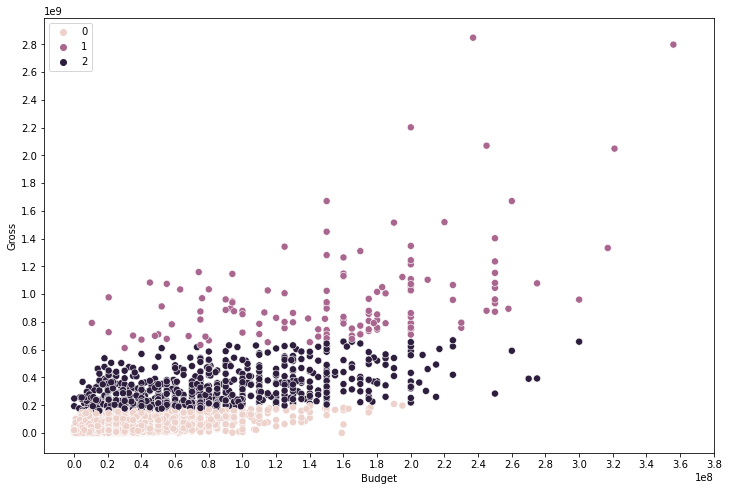

In [13]:
# Plot the clusters for the "budget" and "gross" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = movies_numerical['budget'], y = movies_numerical['gross'], hue = kmeans.labels_, s = 50) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.
ax.grid(False) # This removes the grid from the background.
plt.xlabel('Budget') # Label x-axis.
x_ticks = np.arange(0, 400000000, 20000000)
plt.xticks(x_ticks, rotation = 0)
plt.ylabel('Gross') # Label y-axis.
y_ticks = np.arange(0, 3000000000, 200000000)
plt.yticks(y_ticks, rotation = 0)
plt.show()

In [14]:
# The first cluster in dark purple (coded as 2) gathers data points with higher budget and higher gross figures when releasing films
# The second cluster in purple (coded as 1) gathers data points with lower budget and lower gross figures when releasing films, but higher on average than the third cluster
# The third cluster in salmon (coded as 0) gathers data points with much lower budget and much lower gross figures when releasing films
# The clusters show that film companies that invest more money towards a film have received relatively high gross figures

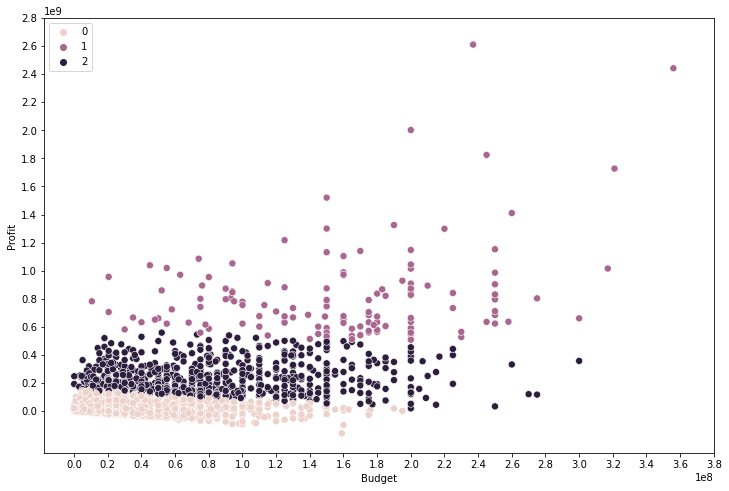

In [15]:
# Plot the clusters for the "budget" and "profit" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x = movies_numerical['budget'], y = movies_numerical['profit'], hue = kmeans.labels_, s = 50)
ax.grid(False) 
plt.xlabel('Budget') 
x_ticks = np.arange(0, 400000000, 20000000)
plt.xticks(x_ticks, rotation = 0)
plt.ylabel('Profit') 
y_ticks = np.arange(0, 3000000000, 200000000)
plt.yticks(y_ticks, rotation = 0)
plt.show()

In [16]:
# The first cluster in dark purple (coded as 2) gathers data points with higher budget and higher profit when releasing films
# The second cluster in purple (coded as 1) gathers data points with lower budget and lower profit when releasing films - but higher on average than the third cluster
# The third cluster in salmon (coded as 0) gathers data points with much lower budget and much lower profit when releasing films
# The clusters show that film companies that invest more money towards a film have received relatively high gross figures, therefore higher profit.

In [17]:
movies_numerical.loc[movies_numerical['clusters'] == 2, 'cluster'] = 'dark purple'
movies_numerical.loc[movies_numerical['clusters'] == 1, 'cluster'] = 'purple'
movies_numerical.loc[movies_numerical['clusters'] == 0, 'cluster'] = 'salmon colored'

/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/matthewabrams/opt/anaconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [18]:
movies_numerical.groupby('cluster').agg({'budget':['mean', 'median'], 
                         'gross':['mean', 'median']})

budget                      gross             
                        mean       median          mean       median
cluster                                                             
dark purple     7.886735e+07   70000000.0  3.086356e+08  274560598.5
purple          1.575148e+08  160000000.0  9.804594e+08  879602366.0
salmon colored  2.318710e+07   20500000.0  3.168211e+07   15852401.0

In [19]:
# The dark purple cluster has the best stats in almost all categories. 
# The average budget invested towards films for the dark purple cluster group is approximately 160 million dollars which is significally larger than the other two cluster groups. 
# At the same time, the average gross earnings received for the dark purple cluster group is approximately 980 million dollars which is significally larger than the other two cluster groups.
# The average budget invested towards films for the other cluster groups are less than 80 million dollars 
# The average budget invested towards films for the purple cluster group is at least 3 times greater than the average budget for the salmon colored cluster group 



In [20]:
movies_numerical.groupby('cluster').agg({'budget':['mean', 'median'], 
                         'profit':['mean', 'median']})

budget                     profit             
                        mean       median          mean       median
cluster                                                             
dark purple     7.886735e+07   70000000.0  2.297683e+08  201856419.0
purple          1.575148e+08  160000000.0  8.229446e+08  735011746.0
salmon colored  2.318710e+07   20500000.0  8.495007e+06    -667308.0

In [21]:
# The average profit earnings received for the dark purple cluster group is approximately 830 million dollars which is significally larger than the other two cluster groups.
# Makes sense for the average profit of the dark cluster group since average budget is 160 million and average gross is 990 million (990 million - 160 million = 830 million)
# The average profit earnings received for the purple cluster group is over 200 million dollars which is significally larger than the salmon colored cluster group
# The average profit earnings received for the salmon-colored cluster group is less than 9 million dollars which is significally less than the other two clustered groups

In [22]:
movies_numerical.to_csv(os.path.join(path, 'Data', 'Prepared Data', 'cluster.csv'))